In [1]:
from acevedo_clss_and_fcns import *


/DeepenData/.miniconda/envs/geo/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


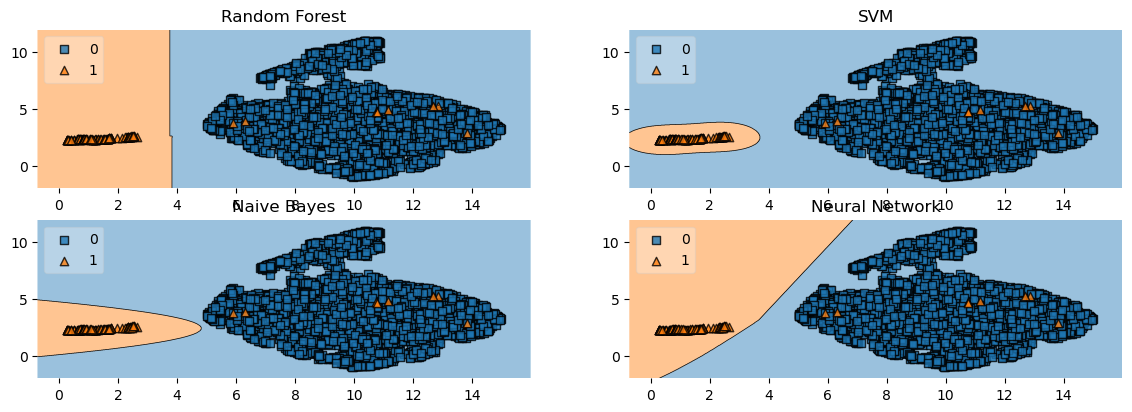

In [2]:
df        = pd.read_csv("./results/data/metabolite_data.csv")
col_names = df.select_dtypes(include=['float']).columns.__array__()
X         = df.select_dtypes(include=['float']).__array__()
le        = preprocessing.LabelEncoder()
y         = le.fit_transform(df.Condicion.__array__())
reducer = umap.UMAP()
embedding = reducer.fit_transform(X)
plot_classsifiers(embedding, y)


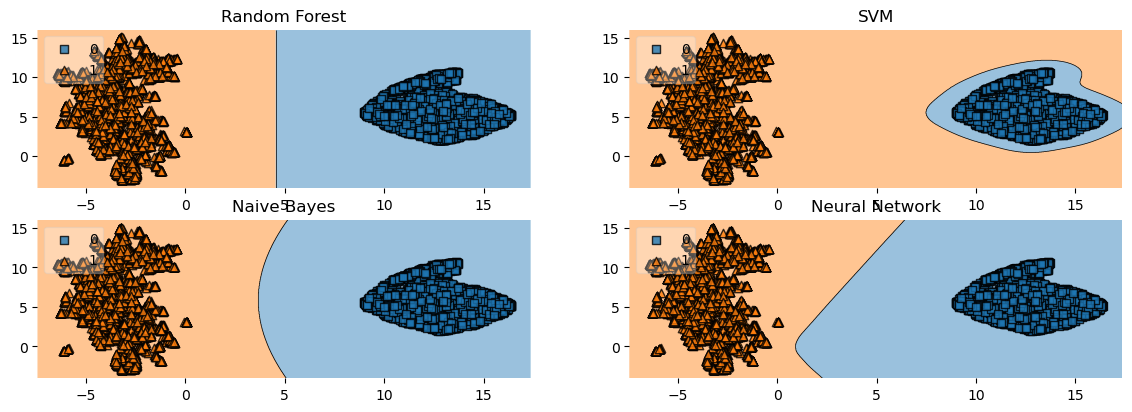

In [3]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE(k_neighbors =100, n_jobs=-1 ).fit_resample(X, y)
embedding                = reducer.fit_transform(X_resampled)
plot_classsifiers(embedding, y_resampled)

In [4]:
aumented_data = pd.concat([ pd.DataFrame(y_resampled.astype(int), columns=['label']), pd.DataFrame(X_resampled, columns=col_names)], axis=1)
aumented_data.to_parquet('./results/data/oversampled_augmented_metabolite_data.parquet.gzip', compression='gzip')